<a href="https://colab.research.google.com/github/pranishasharma/Python-project/blob/main/YT_data_analytics_Project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
api_key = '***************************************'

channel_ids = ['UCwRH985XgMYXQ6NxXDo8npw', #KurzgesagtDE
               'UCxec_VgCE-5DUZ8MocKbEdg', #SWR Marktcheck
               'UCBzai1GXVKDdVCrwlKZg_6Q', #pulsreportage
               'UC1XrG1M_hw8103zO2x-oivg', #GalileoOffiziell
               'UCZuFrqyZWfw_Zf0OnXWUXyQ'] #bayerischerrundfunk

youtube = build('youtube', 'v3', developerKey=api_key)

In [3]:
#  defining a function to retrieve statistical information about YouTube channels.
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data


In [4]:
get_channel_stats(youtube, channel_ids)

[{'Channel_name': 'Galileo',
  'Subscribers': '3230000',
  'Views': '3045144384',
  'Total_videos': '6165',
  'playlist_id': 'UU1XrG1M_hw8103zO2x-oivg'},
 {'Channel_name': 'Bayerischer Rundfunk',
  'Subscribers': '735000',
  'Views': '296917692',
  'Total_videos': '4164',
  'playlist_id': 'UUZuFrqyZWfw_Zf0OnXWUXyQ'},
 {'Channel_name': 'Dinge Erklärt – Kurzgesagt',
  'Subscribers': '2190000',
  'Views': '269644980',
  'Total_videos': '139',
  'playlist_id': 'UUwRH985XgMYXQ6NxXDo8npw'},
 {'Channel_name': 'PULS Reportage',
  'Subscribers': '882000',
  'Views': '370093783',
  'Total_videos': '1030',
  'playlist_id': 'UUBzai1GXVKDdVCrwlKZg_6Q'},
 {'Channel_name': 'SWR Marktcheck',
  'Subscribers': '587000',
  'Views': '355135947',
  'Total_videos': '2422',
  'playlist_id': 'UUxec_VgCE-5DUZ8MocKbEdg'}]

In [5]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [6]:
channel_data = pd.DataFrame(channel_statistics)

In [7]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,PULS Reportage,882000,370093783,1030,UUBzai1GXVKDdVCrwlKZg_6Q
1,Galileo,3230000,3045144384,6165,UU1XrG1M_hw8103zO2x-oivg
2,SWR Marktcheck,587000,355135947,2422,UUxec_VgCE-5DUZ8MocKbEdg
3,Bayerischer Rundfunk,735000,296917692,4164,UUZuFrqyZWfw_Zf0OnXWUXyQ
4,Dinge Erklärt – Kurzgesagt,2190000,269644980,139,UUwRH985XgMYXQ6NxXDo8npw


In [8]:
# changing the data types to numeric
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

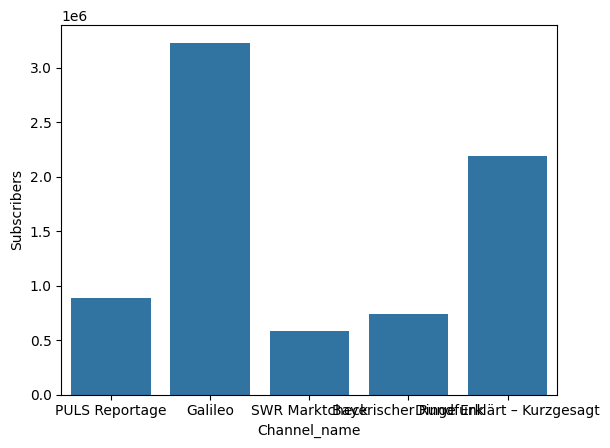

In [9]:
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

Text(0.5, 1.0, 'YouTube Channel Subscribers Count')

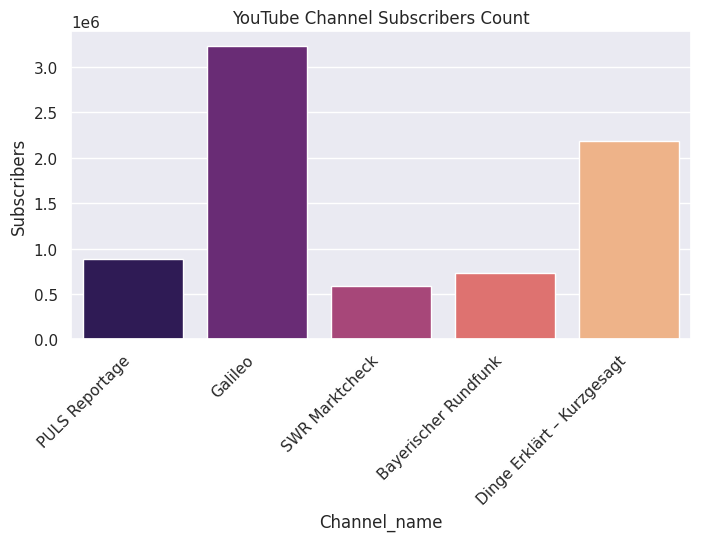

In [10]:
# lets make the above plot better
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data, palette="magma", hue='Channel_name')
tick_positions = range(len(channel_data))
ax.set_xticks(tick_positions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.grid(True)
plt.title("YouTube Channel Subscribers Count")


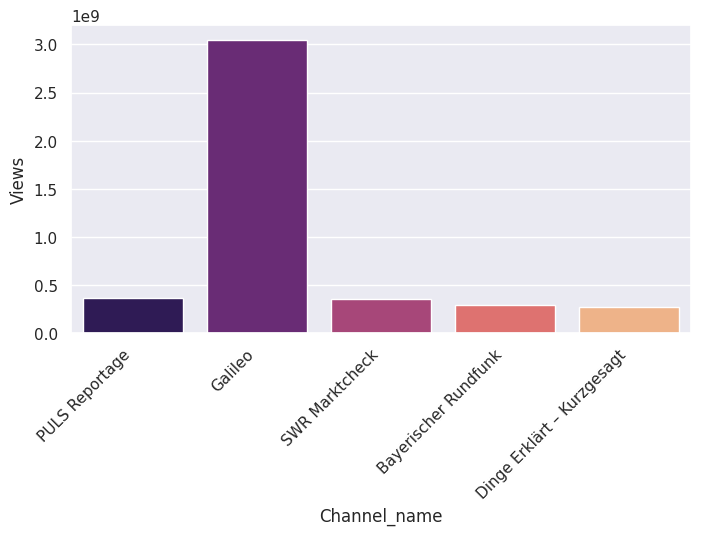

In [11]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data, palette="magma", hue='Channel_name')
tick_positions = range(len(channel_data))
ax.set_xticks(tick_positions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.grid(True)

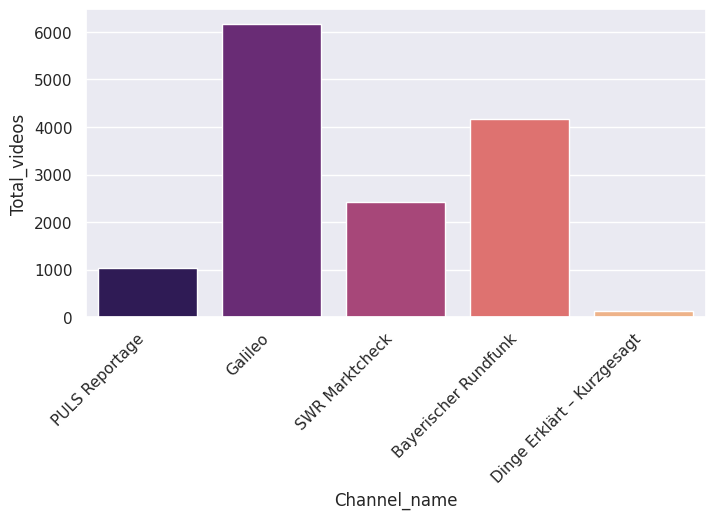

In [12]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data, palette="magma", hue='Channel_name')
tick_positions = range(len(channel_data))
ax.set_xticks(tick_positions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.grid(True)

# **Function to get video IDs**

In [13]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,PULS Reportage,882000,370093783,1030,UUBzai1GXVKDdVCrwlKZg_6Q
1,Galileo,3230000,3045144384,6165,UU1XrG1M_hw8103zO2x-oivg
2,SWR Marktcheck,587000,355135947,2422,UUxec_VgCE-5DUZ8MocKbEdg
3,Bayerischer Rundfunk,735000,296917692,4164,UUZuFrqyZWfw_Zf0OnXWUXyQ
4,Dinge Erklärt – Kurzgesagt,2190000,269644980,139,UUwRH985XgMYXQ6NxXDo8npw


In [14]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Galileo', 'playlist_id'].iloc[0]

In [15]:
playlist_id

'UU1XrG1M_hw8103zO2x-oivg'

In [18]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=5)
    response = request.execute()

    return response

In [19]:
get_video_ids(youtube, playlist_id)
#  Here we get the entire API response.

{'kind': 'youtube#playlistItemListResponse',
 'etag': 'Z1SVDgfTbU1Y5yygVbZX0NiD0l4',
 'nextPageToken': 'EAAafVBUOkNBVWlFREkxUXpOQ04wWkdRVFV6TnpFeVJVVW9BVWpLazlTbWxmYUVBMUFCV2pnaVEyaG9WbFpVUmxsamEyTjRWRlk1YjJSNlozaE5SRTQyVkhwS05FeFhPWEJrYldOVFJFRnFSalIwUTNaQ2FFTlJiSEV0TWtGbkln',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': 'XOOelbHf3EE1gVLQoXCXm-EotgY',
   'id': 'VVUxWHJHMU1faHc4MTAzek8yeC1vaXZnLjNnLUxDV1ljblpN',
   'contentDetails': {'videoId': '3g-LCWYcnZM',
    'videoPublishedAt': '2024-03-15T11:30:02Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'q99gdmM9ELRf98VdpoTGAwxT-VA',
   'id': 'VVUxWHJHMU1faHc4MTAzek8yeC1vaXZnLl8zWTdBR0VFQTQ4',
   'contentDetails': {'videoId': '_3Y7AGEEA48',
    'videoPublishedAt': '2024-03-14T15:51:29Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'tCpFsNMHQbQBhLONDtv8dc4PGME',
   'id': 'VVUxWHJHMU1faHc4MTAzek8yeC1vaXZnLjZ0XzctMGFKamcw',
   'contentDetails': {'videoId': '6t_7-0aJjg0',
    'videoPublishedAt': '2024-03-14T11:30:03Z'}},
  {'

In [21]:
# Modify the functiont to obtain a list of video IDs
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
      if next_page_token is None:
          more_pages = False
      else:
          request = youtube.playlistItems().list(
                      part='contentDetails',
                      playlistId=playlist_id,
                      maxResults=50,
                      pageToken=next_page_token)
          response = request.execute()

      for i in range(len(response['items'])):
          video_ids.append(response['items'][i]['contentDetails']['videoId'])

      next_page_token = response.get('nextPageToken')

    return video_ids


In [22]:
video_ids = get_video_ids(youtube, playlist_id)

In [24]:
sample_video_ids = video_ids[-5:]
sample_video_ids

['qJvx3h1vcc8', 'qxnhfbJKHso', 'SPAuhZyqQUU', 'PA2Vw6J-4qs', 'YC4I1_TYzT8']

## **Function to get video details**

In [25]:

def get_video_details(youtube, video_ids):
    all_video_stats = []

    for i in range(0, len(video_ids), 50):
        try:
            request = youtube.videos().list(
                part='snippet,statistics',
                id=','.join(video_ids[i:i+50])
            )
            response = request.execute()

            for video in response['items']:
                video_stats = dict(
                    Title=video['snippet']['title'],
                    Published_date=video['snippet']['publishedAt'],
                    Views=video['statistics']['viewCount'],
                    Likes=video['statistics'].get('likeCount', 0),  # Handle missing like count
                    #Dislikes=video['statistics'].get('dislikeCount', 0),
                    Comments=video['statistics'].get('commentCount', 0)
                )
                all_video_stats.append(video_stats)
        except Exception as e:
            print(f"Error fetching video details: {str(e)}")

    return all_video_stats


In [26]:
video_details = get_video_details(youtube, video_ids)

In [27]:
video_data = pd.DataFrame(video_details)

In [28]:
video_data

,Title,Published_date,Views,Likes,Comments
0,Secret-Packs-Automat: Heiße Ware für wenig Gel...,2024-03-15T11:30:02Z,2081,91,24
1,Warst du schon mal in einem Sterne-Restaurant?😋,2024-03-14T15:51:29Z,5766,182,5
2,1.500 km/h in mehr als 10.000 Metern Höhe: Der...,2024-03-14T11:30:03Z,38830,796,116
3,50.000€ Schulgeld im Jahr: Wir begleiten eine ...,2024-03-13T17:30:11Z,105074,1611,263
4,Deconstructed Rolex: Wir nehmen den Luxusuhren...,2024-03-13T11:30:23Z,103785,1523,187
...,...,...,...,...,...
6177,Ort der Woche: Skurille Wohnwagen | Galileo,2013-09-27T07:35:13Z,253480,1174,22
6178,Galileo Schlaumeier: Big Brother | Galileo,2013-09-27T07:34:19Z,24908,117,5
6179,Speedwissen: Körperpflege | Galileo,2013-09-27T07:33:20Z,951395,6084,541
6180,Galileo Schlaumeier: Eine Abfuhr erteilen | Ga...,2013-09-27T07:33:03Z,37187,271,39


In [29]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data

,Title,Published_date,Views,Likes,Comments
0,Secret-Packs-Automat: Heiße Ware für wenig Gel...,2024-03-15,2081,91,24
1,Warst du schon mal in einem Sterne-Restaurant?😋,2024-03-14,5766,182,5
2,1.500 km/h in mehr als 10.000 Metern Höhe: Der...,2024-03-14,38830,796,116
3,50.000€ Schulgeld im Jahr: Wir begleiten eine ...,2024-03-13,105074,1611,263
4,Deconstructed Rolex: Wir nehmen den Luxusuhren...,2024-03-13,103785,1523,187
...,...,...,...,...,...
6177,Ort der Woche: Skurille Wohnwagen | Galileo,2013-09-27,253480,1174,22
6178,Galileo Schlaumeier: Big Brother | Galileo,2013-09-27,24908,117,5
6179,Speedwissen: Körperpflege | Galileo,2013-09-27,951395,6084,541
6180,Galileo Schlaumeier: Eine Abfuhr erteilen | Ga...,2013-09-27,37187,271,39


In [30]:
top10_videos = video_data.sort_values(by='Views',ascending=False).head(10)

In [31]:
top10_videos

,Title,Published_date,Views,Likes,Comments
5709,Wahnsinn! Unglaubliches über den menschlichen ...,2015-06-14,38440019,36499,1780
5763,1 Tag Geschlechtsumwandlung: Aus Mann mach Fra...,2015-05-11,14870867,111770,7847
6054,"""C-String"" - Der kleinste Bikini der Welt! Der...",2014-01-11,13234672,26497,2300
3494,Der größte Teenager der Welt - wie lebt es sic...,2018-07-28,13021249,109749,9388
5871,18.000€ - Das teuerste Luxus-Flugticket der We...,2015-02-03,11178802,99706,6380
5544,80kg! Hulk ist der größte Pitbull der Welt! | ...,2015-09-16,10630843,79399,4858
4097,Spicker im Test - Lehrer vs. Schüler | Galileo...,2017-10-02,9670308,133487,6022
4979,25 Jahre nur Pizza essen!? Wie (un)gesund ist ...,2016-07-08,9545762,96818,10664
5325,Türkische Hochzeit - So pompös wird gefeiert! ...,2016-01-18,9122878,61363,7411
5923,Viagra für Frauen?! 15 intime Mythen | Galileo...,2014-10-29,8261905,41204,2000


In [ ]:
# top10_videos.replace(to_replace="How Statistics Saved the US SERIOUS $$$$ During WW2 #Shorts",
#            value="How Statistics Saved the US SERIOUS Dollars During WW2 #Shorts",inplace=True)

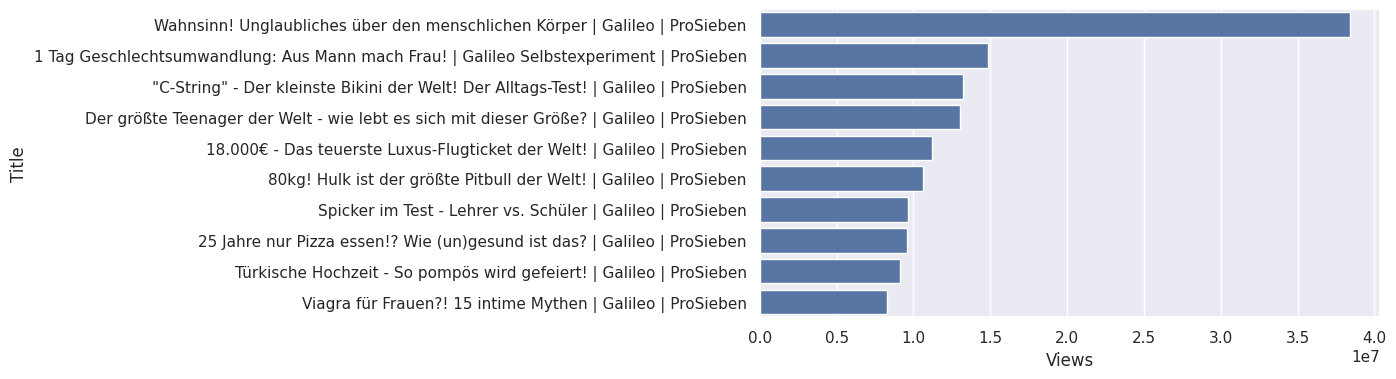

In [32]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

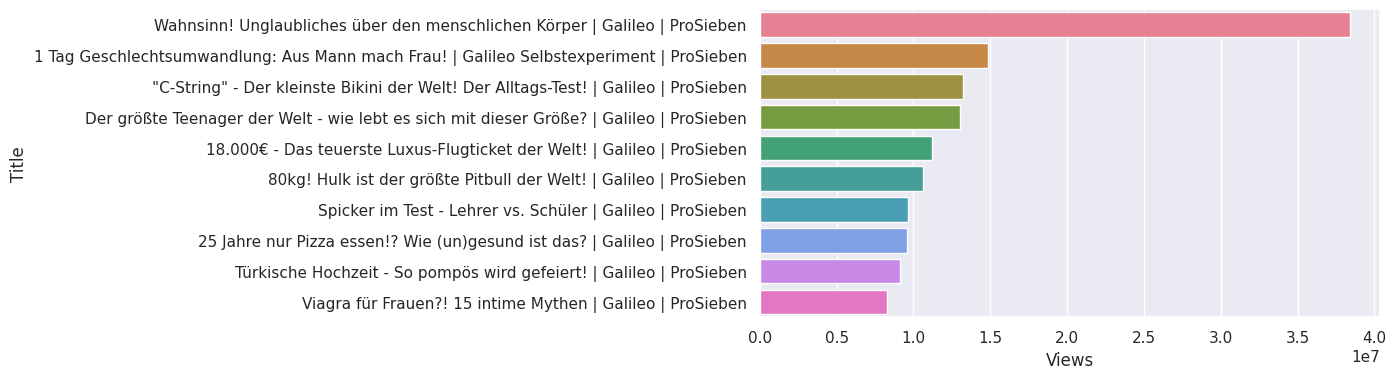

In [33]:
colors = sns.color_palette('husl', n_colors=len(top10_videos))
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos,palette=colors, hue='Title')

In [34]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [35]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,Secret-Packs-Automat: Heiße Ware für wenig Gel...,2024-03-15,2081,91,24,Mar
1,Warst du schon mal in einem Sterne-Restaurant?😋,2024-03-14,5766,182,5,Mar
2,1.500 km/h in mehr als 10.000 Metern Höhe: Der...,2024-03-14,38830,796,116,Mar
3,50.000€ Schulgeld im Jahr: Wir begleiten eine ...,2024-03-13,105074,1611,263,Mar
4,Deconstructed Rolex: Wir nehmen den Luxusuhren...,2024-03-13,103785,1523,187,Mar
...,...,...,...,...,...,...
6177,Ort der Woche: Skurille Wohnwagen | Galileo,2013-09-27,253480,1174,22,Sep
6178,Galileo Schlaumeier: Big Brother | Galileo,2013-09-27,24908,117,5,Sep
6179,Speedwissen: Körperpflege | Galileo,2013-09-27,951395,6084,541,Sep
6180,Galileo Schlaumeier: Eine Abfuhr erteilen | Ga...,2013-09-27,37187,271,39,Sep


In [36]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [37]:
videos_per_month

,Month,size
0,Apr,473
1,Aug,460
2,Dec,551
3,Feb,520
4,Jan,568
5,Jul,471
6,Jun,492
7,Mar,512
8,May,498
9,Nov,557


In [38]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [39]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [40]:
videos_per_month = videos_per_month.sort_index()

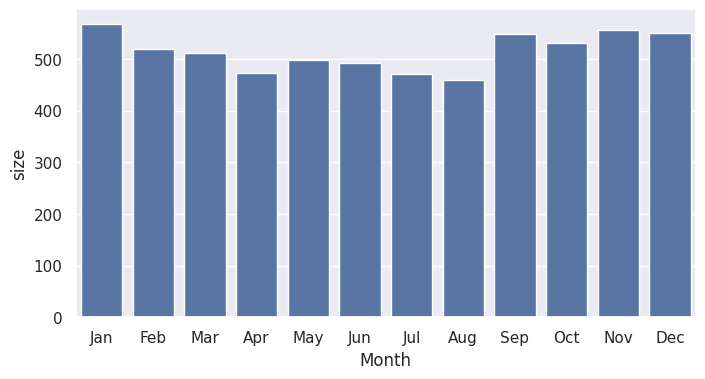

In [41]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [ ]:
# video_data.to_csv('Video_Details(YT Channels data).csv')